<a href="https://colab.research.google.com/github/Brenorp/RO-cost-simulator/blob/main/muh_sim_shadowgear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

for reference: https://en.wikipedia.org/wiki/Markov_chain

**(I'm actually not sure if these cases can actually be described as markov chain problems due to the nature of the "pity system" present in MuhRO, that may break the markov property. If any real statician read this please let me know:D)**

transition model for using shadow gear hammer when equipment reaches +6

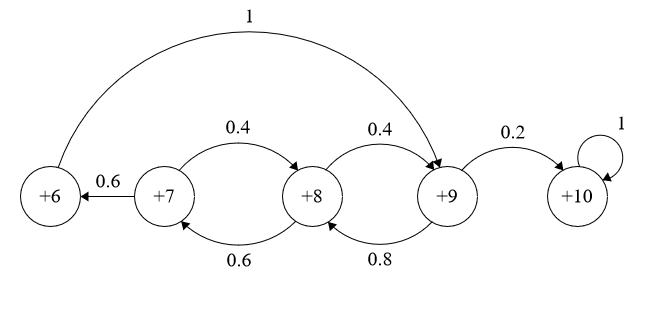

transition model for using shadow gear hammer when equipment reaches +7

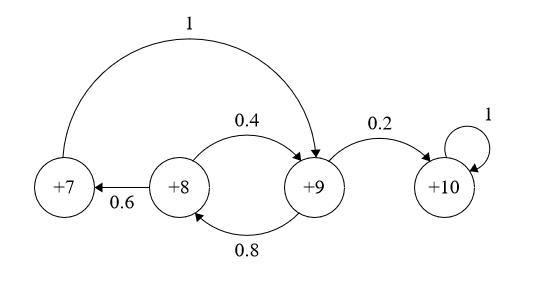

transition model for using shadow gear hammer when equipment reaches +8

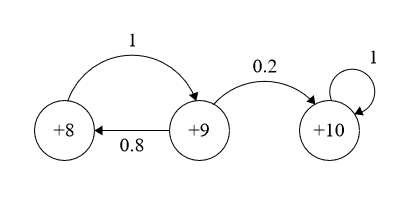



In [ ]:
import random
import pandas as pd
from pandas import DataFrame

In [ ]:
def simulation(step, right, pity, material_price, hammer_price):
  cost = 0
  target_reached = False

  while target_reached == False:

    rng = random.random()

    cost = cost + 0.05 + material_price


    if (rng < right[step]): # on success

      right[step] = pity[step]*10 # revert state to non-pity probability

      step = step+1 # state transition

      if(step == len(right)): #equipment reached +10

        target_reached = True #flag to exit loop



    else: # on failure

      right[step] = right[step] + pity[step] # add pity to state probablity

      step = step-1 # state transition

      if(step == -1): #equipment reach lowest state and needs a hammer

        cost = cost + hammer_price

        step = len(right) - 1    # reset equipment to state +9

  return cost

In [ ]:
#material pricing
elunium_price = 1.5
shadow_hammer_price = 15


In [ ]:
# transition models for each case illustrated
success_transition_6 = [0.4, 0.4, 0.2]
success_transition_7 = [0.4, 0.2]
success_transition_8 = [0.2]

# pity system for each case illustrated
pity_system_6 = [0.04, 0.04, 0.02]
pity_system_7 = [0.04, 0.02]
pity_system_8 = [0.02]

# always starting process at +9
start_6 = len(success_transition_6) - 1
start_7 = len(success_transition_7) - 1
start_8 = len(success_transition_8) - 1


cost_list_6 = []
cost_list_7 = []
cost_list_8 = []

i = 0 #iterator
size = 1000000 #size of dataset

while i < size:

  total_cost = 0
  total_cost = simulation(start_6, success_transition_6, pity_system_6, elunium_price, shadow_hammer_price)
  cost_list_6.append(total_cost)

  total_cost = 0
  total_cost = simulation(start_7, success_transition_7, pity_system_7, elunium_price, shadow_hammer_price)
  cost_list_7.append(total_cost)

  total_cost = 0
  total_cost = simulation(start_8, success_transition_8, pity_system_8, elunium_price, shadow_hammer_price)
  cost_list_8.append(total_cost)

  i = i + 1

cost_dict = {'hammer at +6': cost_list_6 ,'hammer at +7':cost_list_7, 'hammer at +8': cost_list_8 }

df = DataFrame(cost_dict) #mount dataframe

df.describe()

,hammer at +6,hammer at +7,hammer at +8
count,1000000.000000,1000000.000000,1000000.000000
mean,34.304443,35.895070,51.265555
std,33.418845,34.266766,46.559604
min,1.550000,1.550000,1.550000
25%,4.650000,4.650000,18.100000
50%,26.350000,25.850000,34.650000
75%,50.150000,55.850000,84.300000
max,316.950000,306.650000,382.200000


for bsb refinement its normally simple to calculate directly, but since we have the pity system in place, it gets a bit more complex, so I think we need to simulate it too

**this simulation works by trying the single step (be it +9, +10 or +10) until the first success, adding pity after each failure.**

Also, instead of calculating the cost outright, we need only to observe how many attempts on average. This way we can apply material costs for each attempt on average

In [ ]:

def simulation_bsb(step, chance_table, pity):

  target_reached = False
  attempts = 0

  while target_reached == False:

    rng = random.random()

    attempts = attempts + 1
    #print('attempting')

    if (rng < chance_table[step]): # on success

      chance_table[step] = pity[step]*10 # revert state to non-pity probability, for subsequent simulations
      #print('sucesso')
      #print(attempts)
      target_reached = True #flag to exit loop

    #else: # on failure
      #print('falhou')
      chance_table[step] = chance_table[step] + pity[step] # add pity to state probablity

  return attempts

In [ ]:

# table of rates for +9, +10 and +11 respectively, on normal/special materials
# using bsb normal materials just seem bad, but I left it here to compare shadow gear bsb attempts at +9 against the '+9 hammer method'
success_table_normal = [0.2, 0.16, 0.16]
success_table_special = [0.3, 0.2, 0.2]


# pity system for each case
pity_system_normal = [0.02, 0.016, 0.016]
pity_system_special = [0.03, 0.02, 0.02]

start_9 = 0
start_10 = 1
start_11 = 2

attempts_list_9 = []
attempts_list_10 = []
attempts_list_11 = []

i = 0 #iterator
size = 1000000 #size of dataset

while i < size:

  no_of_attempts = 0
  no_of_attempts = simulation_bsb(start_9, success_table_special, pity_system_special)
  attempts_list_9.append(no_of_attempts)

  no_of_attempts = 0
  no_of_attempts = simulation_bsb(start_10, success_table_special, pity_system_special)
  attempts_list_10.append(no_of_attempts)

  no_of_attempts = 0
  no_of_attempts = simulation_bsb(start_11, success_table_special, pity_system_special)
  attempts_list_11.append(no_of_attempts)

  i = i + 1

attempts_dict = {'attempts at +9': attempts_list_9 ,'attempts at +10':attempts_list_10, 'attempts at +11': attempts_list_11 }

df2 = DataFrame(attempts_dict) #mount dataframe

df2.describe()

,attempts at +9,attempts at +10,attempts at +11
count,1000000.000000,1000000.000000,1000000.000000
mean,3.032244,4.542834,4.546724
std,2.479068,4.014568,4.015961
min,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000
50%,2.000000,3.000000,3.000000
75%,4.000000,6.000000,6.000000
max,36.000000,51.000000,57.000000


if we calculate the average number of trials without pity, we have:

**+9 to +10 without pity: 1/0.3 == 3.33 *attempts on average***

**+10 to +11 and +11 to +12 without pity: 1/0.2 == 5 *attempts on average***

here we notice that the pity does indeed help with lowering expected number of attempts (3.03 and 4.54 respectively)

now we just need to multiply the cost of a single attempt by the average
